# Whale and Dolphin identification

I will try and buil a ML algorithm that is capable of identifying almost 28k unique individual marine mammals belonging to 30 species.

Dataset can be downloaded from [here](https://www.kaggle.com/bdsaglam/happy-whale-512?select=sample_submission.csv). This is the "simplified version" of the [original dataset](https://www.kaggle.com/c/happy-whale-and-dolphin/data) in that all the figures have the same size (512x512) -- if smaller they are padded. 

The files are already divided into train and test folders. *** Review this ***

I will proceed in a similar fashion to facial recognition algorithms:
1. start with detecting fins inside the figure by using HOG features
2. find an optimal number of interesting features
3. train the algorithm into recognising the relevant features
4. test the algorithm


### Contour detection: HOG features

In [1]:
import os 
import numpy as np
import cv2
%matplotlib inline

from matplotlib import pyplot as plt

Fontconfig warning: ignoring UTF-8: not a valid region tag


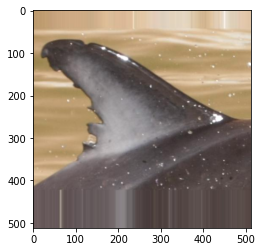

In [12]:
filename = '/Users/enrico/Documents/PhD/courses/MPAGS_ML/whale_recognition/archive/test_images/0a1c132fd0b189.jpg'

img = cv2.imread(filename)
img = np.float32(img) / 255.0
# Calculate gradient
gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)

mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
plt.imshow(img)

In [15]:
mag.shape

(512, 512, 3)

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# h, x, w in pixels
cell_size = (8,8)
# h, x, w in cells
block_size = (2,2)
# Number of orientation bins
nbins = 9

# Using OpenCV's HOG Descriptor
# WinSize is the size of the image cropped to multiple of the cell size
hog = cv2.HOGDescriptor(_winSize = (gray.shape[1] // cell_size[1] * cell_size[1], gray.shape[0] // cell_size[0] * cell_size[0]), _blockSize = (block_size[1] * cell_size[1], block_size[0] * cell_size[0]), _blockStride = (cell_size[1], cell_size[0]), _cellSize = (cell_size[1], cell_size[0]), _nbins = nbins)

# Create numpy array shape which we use to create hog_feats
n_cells = (gray.shape[0]// cell_size[0], gray.shape[1]// cell_size[1])


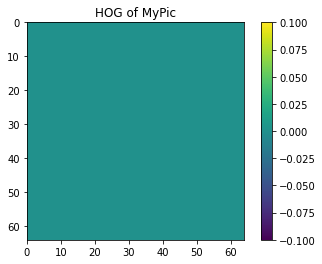

In [11]:
# We index blocks by rows first
# hog_feats now contains the gradient amplitude for each direction,
# for each celll of its group for each group. Indexing is by rows then columns.
hog_feats = hog.compute(gray).reshape( n_cells[1] - block_size[1] +1, n_cells[0] - block_size[0] +1, block_size[0], block_size[1], nbins).transpose((1,0,2,3,4))
# Create our gradients array with nbins dimensions to store gradient orientations
gradients = np.zeros((n_cells[0], n_cells[1], nbins))
# Create array of dimensions
cell_count = np.full(( n_cells[0],n_cells[1],1), 0, dtype=int)
# Block Normalization
for off_y in range(block_size[0]):
        for off_x in range(block_size[1]):
            gradients[off_y:n_cells[0] - block_size[0] + off_y + 1, off_x:n_cells[1] - block_size[1] + off_x + 1] += hog_feats[:,:,off_y,off_x,:]
            cell_count[off_y:n_cells[0] - block_size[0] + off_y +1, off_x: n_cells[1] -block_size[1] + off_x + 1] += 1

# Average gradients
gradients /= cell_count

# Plot HOGs using Matplotlib
# angle is 360/nbins * directions
color_bins = 5
plt.pcolor(gradients[:,:, color_bins])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.title("HOG of MyPic")
plt.savefig("HOG of MyPic.jpg")
plt.show()
cv2.destroyAllWindows()

### Optimal number of interesing features

### Train stage

### Test stage